In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
os.getcwd()

'/workspace'

In [3]:
data = pd.read_csv('Crime_Clean.csv')

In [4]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Total Laborforce,Total Unemployed,Start_Date_Time,Location,Longitude,Latitude,High School %,Bachelors %,Public Transportation %,Unemployed %
0,50,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,12/06/2019 09:16:00 PM,"(39.2006, -77.1996)",-77.199620,39.200626,0.083714,0.270167,0.049515,0.029053
1,51,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,1067.0,31.0,04/13/2019 02:00:00 AM,"(39.1977, -77.1997)",-77.199669,39.197675,0.083714,0.270167,0.049515,0.029053
2,52,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,1067.0,31.0,03/13/2020 09:09:00 AM,"(39.2081, -77.1748)",-77.174806,39.208137,0.083714,0.270167,0.049515,0.029053
3,53,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,11/15/2019 04:33:00 PM,"(39.2025, -77.1848)",-77.184766,39.202456,0.083714,0.270167,0.049515,0.029053
4,54,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,1067.0,31.0,07/22/2016 10:27:00 PM,"(39.205, -77.1643)",-77.164342,39.204973,0.083714,0.270167,0.049515,0.029053


In [5]:
len(data)

235368

In [6]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
High School %                0
Bachelors %                  0
Public Transportation %      0
Unemployed %                 0
dtype: int64

In [7]:
data = data.drop('City',1)

In [8]:
data = data[~data['Crime Name1'].isnull()]

In [9]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
dtype: int64

In [10]:
data = data[data['Crime Name1'] != 'Other']

In [11]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude', 'Crime Name2'],1)

In [12]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                           20699
DRUGS - MARIJUANA - POSSESS                   14408
ASSAULT - 2ND DEGREE                          12724
LARCENY - SHOPLIFTING                         12145
DRIVING UNDER THE INFLUENCE LIQUOR            11747
LARCENY (DESCRIBE OFFENSE)                     9687
DAMAGE PROPERTY - PRIVATE                      9123
LARCENY - FROM BLDG                            8310
IDENTITY THEFT                                 4896
LIQUOR - POSSESS                               4411
PUBLIC PEACE - DISORDERLY CONDUCT              4318
AUTO THEFT - VEHICLE THEFT                     4149
LARCENY - AUTO PARTS                           4056
TRESPASSING                                    3378
FRAUD - ILLEGAL USE CREDIT CARDS               3358
DAMAGE PROPERTY (DESCRIBE OFFENSE)             3146
JUVENILE - RUNAWAY                             2817
ASSAULT - SIMPLE                               2792
BURGLARY - FORCED ENTRY-RESIDENTIAL            2710
FRAUD (DESCR

In [13]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'High School %', 'Bachelors %',
       'Public Transportation %', 'Unemployed %'],
      dtype='object')

In [14]:
data.shape

(187827, 16)

In [15]:
data['Place'].value_counts().loc[lambda x: x > 1000]

Street - In vehicle                   27251
Residence - Single Family             14706
Residence - Apartment/Condo           14260
Street - Residential                  13815
Other/Unknown                         11922
Parking Lot - Residential             11026
Residence - Driveway                   8425
Parking Lot - Commercial               7536
Residence -Townhouse/Duplex            6935
Retail - Department/Discount Store     5918
Street - Commercial                    5208
School/College                         4215
Retail - Mall                          4067
Restaurant                             3883
Grocery/Supermarket                    3748
Street - Other                         3503
Retail - Other                         2798
Residence - Other                      2535
Convenience Store                      2267
Residence - Yard                       2140
Commercial - Office Building           2024
Parking Garage - Residential           1690
Street - Bus Stop               

In [16]:
places = data['Place'].value_counts().loc[lambda x: x > 8000]

top_places = list(places.index.values)

data = data[data['Place'].isin(top_places)]

In [17]:
data['Crime Name1'].value_counts()

Crime Against Property    53671
Crime Against Society     34684
Crime Against Person      11357
Not a Crime                1693
Name: Crime Name1, dtype: int64

In [18]:
data= data[data['Crime Name1'] != 'Not a Crime']

In [19]:
data = pd.get_dummies(data, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])

In [20]:
data.shape

(99712, 30)

In [21]:
features = data[data.columns[~data.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Location','Start_Date_Time'])]]

In [22]:
data = data.drop(['Crime Name1'], 1)

In [23]:
data['Crime Name3'].value_counts().loc[lambda x: (x < 1000) & (x > 300)]

FRAUD - SWINDLE                                      789
PUBLIC PEACE - DISORDERLY CONDUCT                    775
OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           735
PUBLIC PEACE - HARASSING COMMUNICATION               728
TRESPASSING                                          687
RAPE - STRONG-ARM                                    618
ALL OTHER OFFENSES                                   589
DRUGS - MARIJUANA - SELL                             510
DRIVING UNDER THE INFLUENCE DRUGS                    504
FORGERY OF CHECKS                                    479
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)    477
DRUGS - OPIUM OR DERIVATIVE - POSSESS                442
ASSAULT - AGGRAVATED - FAMILY-OTHER WEAPON           411
DRUGS - COCAINE - SELL                               377
ASSAULT - AGGRAVATED - NON-FAMILY-OTHER WEAPON       366
WEAPON - POSSESSION                                  363
LIQUOR (DESCRIBE OFFENSE)                            314
WEAPON - CONCEALED             

In [24]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                       15916
DRUGS - MARIJUANA - POSSESS               10427
DRIVING UNDER THE INFLUENCE LIQUOR        10276
ASSAULT - 2ND DEGREE                       6282
DAMAGE PROPERTY - PRIVATE                  5946
IDENTITY THEFT                             4236
LARCENY (DESCRIBE OFFENSE)                 3252
LARCENY - AUTO PARTS                       2913
AUTO THEFT - VEHICLE THEFT                 2749
FRAUD - ILLEGAL USE CREDIT CARDS           2236
LARCENY - FROM BLDG                        2185
BURGLARY - FORCED ENTRY-RESIDENTIAL        2095
DAMAGE PROPERTY (DESCRIBE OFFENSE)         1722
FRAUD (DESCRIBE OFFENSE)                   1491
ASSAULT - SIMPLE                           1405
FRAUD - IMPERSONATION                      1295
BURGLARY - NO FORCED ENTRY-RESIDENTIAL     1294
FRAUD - CONFIDENCE GAME                    1168
DRUGS - NARCOTIC EQUIP - POSSESS           1072
DRUGS - COCAINE - POSSESS                  1061
LIQUOR - POSSESS                        

In [25]:
import re

In [26]:
pattern1 = r'.*\s*(ASSAULT)\.*'
pattern2 = r'.*\s*(DRUGS|INFLUENCE)\.*'
pattern3 = r'.*\s*(FRAUD|IDENTITY|FORGERY)\.*'
pattern4 = r'.*\s*(DAMAGE PROPERTY|AUTO)\.*'


for i, rowseries in data.iterrows():
    if re.match(pattern1, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Assault'
    elif re.match(pattern2, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Drugs/DUI'
    elif re.match(pattern3, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Fraud'
    elif re.match(pattern4, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Property Theft/Damage'
    else:
        data.at[i,'Crime Type'] = 'All Other Offenses'
        
                                            

In [27]:
data['Crime Type'].value_counts()

Property Theft/Damage    29629
Drugs/DUI                26594
All Other Offenses       20866
Fraud                    12347
Assault                  10276
Name: Crime Type, dtype: int64

In [28]:
rand = data[['Crime Name3','Crime Type']]
rand = data[data['Crime Type'] == 'All Other Offenses']
rand['Crime Name3'].value_counts().loc[lambda x: x > 100]

LARCENY (DESCRIBE OFFENSE)                            3252
LARCENY - FROM BLDG                                   2185
BURGLARY - FORCED ENTRY-RESIDENTIAL                   2095
BURGLARY - NO FORCED ENTRY-RESIDENTIAL                1294
LIQUOR - POSSESS                                      1025
PUBLIC PEACE - DISORDERLY CONDUCT                      775
OBSTRUCT GOVT - VIOLATION OF A COURT ORDER             735
PUBLIC PEACE - HARASSING COMMUNICATION                 728
TRESPASSING                                            687
RAPE - STRONG-ARM                                      618
ALL OTHER OFFENSES                                     589
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)      477
WEAPON - POSSESSION                                    363
LIQUOR (DESCRIBE OFFENSE)                              314
WEAPON - CONCEALED                                     312
LARCENY - POSTAL                                       305
ROBBERY - STREET-STRONG-ARM                            2

In [29]:
data2 = data[data['Crime Type'] != 'All Other Offenses']
data2['Crime Type'].value_counts()

Property Theft/Damage    29629
Drugs/DUI                26594
Fraud                    12347
Assault                  10276
Name: Crime Type, dtype: int64

In [30]:
classes2 = data2['Crime Type'].value_counts()

top_classes = list(classes2.index.values)

In [32]:
top_classes = sorted(top_classes)
top_classes

['Assault', 'Drugs/DUI', 'Fraud', 'Property Theft/Damage']

In [103]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data2['Crime Type'] = le.fit_transform(data2['Crime Type'])

In [34]:
features = data2[data2.columns[~data2.columns.isin(['Incident ID','Block','Crime Name3','Crime Type','Location','Start_Date_Time'])]]

In [35]:
features.shape

(78846, 24)

In [104]:
data2['Crime Type'].value_counts()

0    68570
1    10276
Name: Crime Type, dtype: int64

In [37]:
##labels2 = np.array(data2['Crime Type'])
features2 = np.array(features)

In [38]:
features2[0]

array([1.00000000e+00, 1.93100000e+03, 2.22619000e+05, 4.87000000e+01,
       1.60633484e-01, 3.13725490e-01, 6.58174098e-02, 4.88687783e-02,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [39]:
labels2[0]

2

In [40]:
len(np.unique(labels2))

4

In [41]:
num_classes2= len(np.unique(labels2))

In [42]:
from sklearn.model_selection import train_test_split
train2, test2, train_labels2, test_labels2 = train_test_split(features2,labels2,test_size=0.25,random_state=4)

In [43]:
train2.shape

(59134, 24)

In [44]:
test2.shape

(19712, 24)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [46]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test2, test_labels2, dummy)
print('Mean Accuracy:' + str(np.mean(scores)))

Mean Accuracy:0.37591315515502305


(array([ 7733.,     0.,     0.,     0.,     0.,     0., 19973.,     0.,
            0.,     0.,     0.,     0.,     0.,  9209.,     0.,     0.,
            0.,     0.,     0., 22219.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

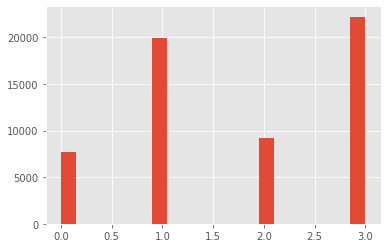

In [47]:
plt.hist(train_labels2, bins=20)
plt.show()

In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(train2, train_labels2)

(array([22219.,     0.,     0.,     0.,     0.,     0., 22219.,     0.,
            0.,     0.,     0.,     0.,     0., 22219.,     0.,     0.,
            0.,     0.,     0., 22219.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

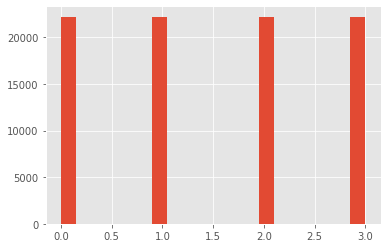

In [49]:
plt.hist(y_sm, bins=20)
plt.show()

In [50]:
smote2 = SMOTE('minority')

X_sm2, y_sm2 = smote2.fit_resample(train2, train_labels2)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


(array([22219.,     0.,     0.,     0.,     0.,     0., 19973.,     0.,
            0.,     0.,     0.,     0.,     0.,  9209.,     0.,     0.,
            0.,     0.,     0., 22219.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

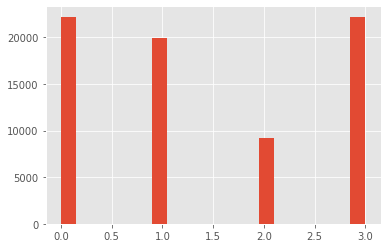

In [51]:
plt.hist(y_sm2, bins=20)
plt.show()

In [52]:
under = RandomUnderSampler('majority')

X_u, Y_u = under.fit_resample(train2, train_labels2)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


(array([ 7733.,     0.,     0.,     0.,     0.,     0., 19973.,     0.,
            0.,     0.,     0.,     0.,     0.,  9209.,     0.,     0.,
            0.,     0.,     0.,  7733.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

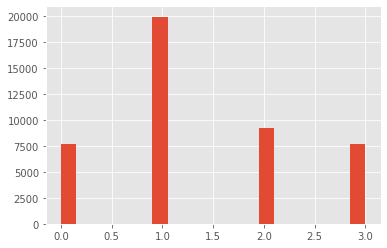

In [53]:
plt.hist(Y_u, bins=20)
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model2.fit(train2,train_labels2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [55]:
from sklearn.metrics import accuracy_score

predictions2 = model2.predict(test2)

print("Accuracy: " + str(accuracy_score(test_labels2, predictions2)))

Accuracy: 0.8125


[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [56]:
model2.fit(X_sm,y_sm)

predictions3 = model2.predict(test2)

accuracy_score(test_labels2, predictions3)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.8109273538961039

In [57]:
model2.fit(X_sm2,y_sm2)

predictions4 = model2.predict(test2)

accuracy_score(test_labels2, predictions4)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.811028814935065

In [58]:
model2.fit(X_u, Y_u)

predictions5 = model2.predict(test2)

accuracy_score(test_labels2, predictions5)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7901278409090909

In [59]:
importances = list(model2.feature_importances_)
feature_list = list(features.columns)
feature_importances = [(feature, importance) for feature, importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: Place_Street - In vehicle                Importance: 0.30316171562878724
Variable: Place_Other/Unknown                      Importance: 0.2093373821896225
Variable: Place_Residence - Apartment/Condo        Importance: 0.07878724894656075
Variable: Place_Residence - Driveway               Importance: 0.06227943400482703
Variable: Place_Residence - Single Family          Importance: 0.05831910014481677
Variable: Place_Parking Lot - Residential          Importance: 0.04904043889881227
Variable: Victims                                  Importance: 0.04527125123390108
Variable: Place_Street - Residential               Importance: 0.03920365062210662
Variable: Income                                   Importance: 0.02426565974056031
Variable: Age                                      Importance: 0.02135206502089155
Variable: High School %                            Importance: 0.0203391428675256
Variable: Bachelors %                              Importance: 0.01888630558189203
Variab

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [60]:
top_features_list = []
top_importances = []

for x,y in feature_importances:
    if(y > 0.025):
        top_features_list.append(x)
        top_importances.append(y)
print(top_features_list)
print(top_importances)

['Place_Street - In vehicle', 'Place_Other/Unknown', 'Place_Residence - Apartment/Condo', 'Place_Residence - Driveway', 'Place_Residence - Single Family', 'Place_Parking Lot - Residential', 'Victims', 'Place_Street - Residential']
[0.30316171562878724, 0.2093373821896225, 0.07878724894656075, 0.06227943400482703, 0.05831910014481677, 0.04904043889881227, 0.04527125123390108, 0.03920365062210662]


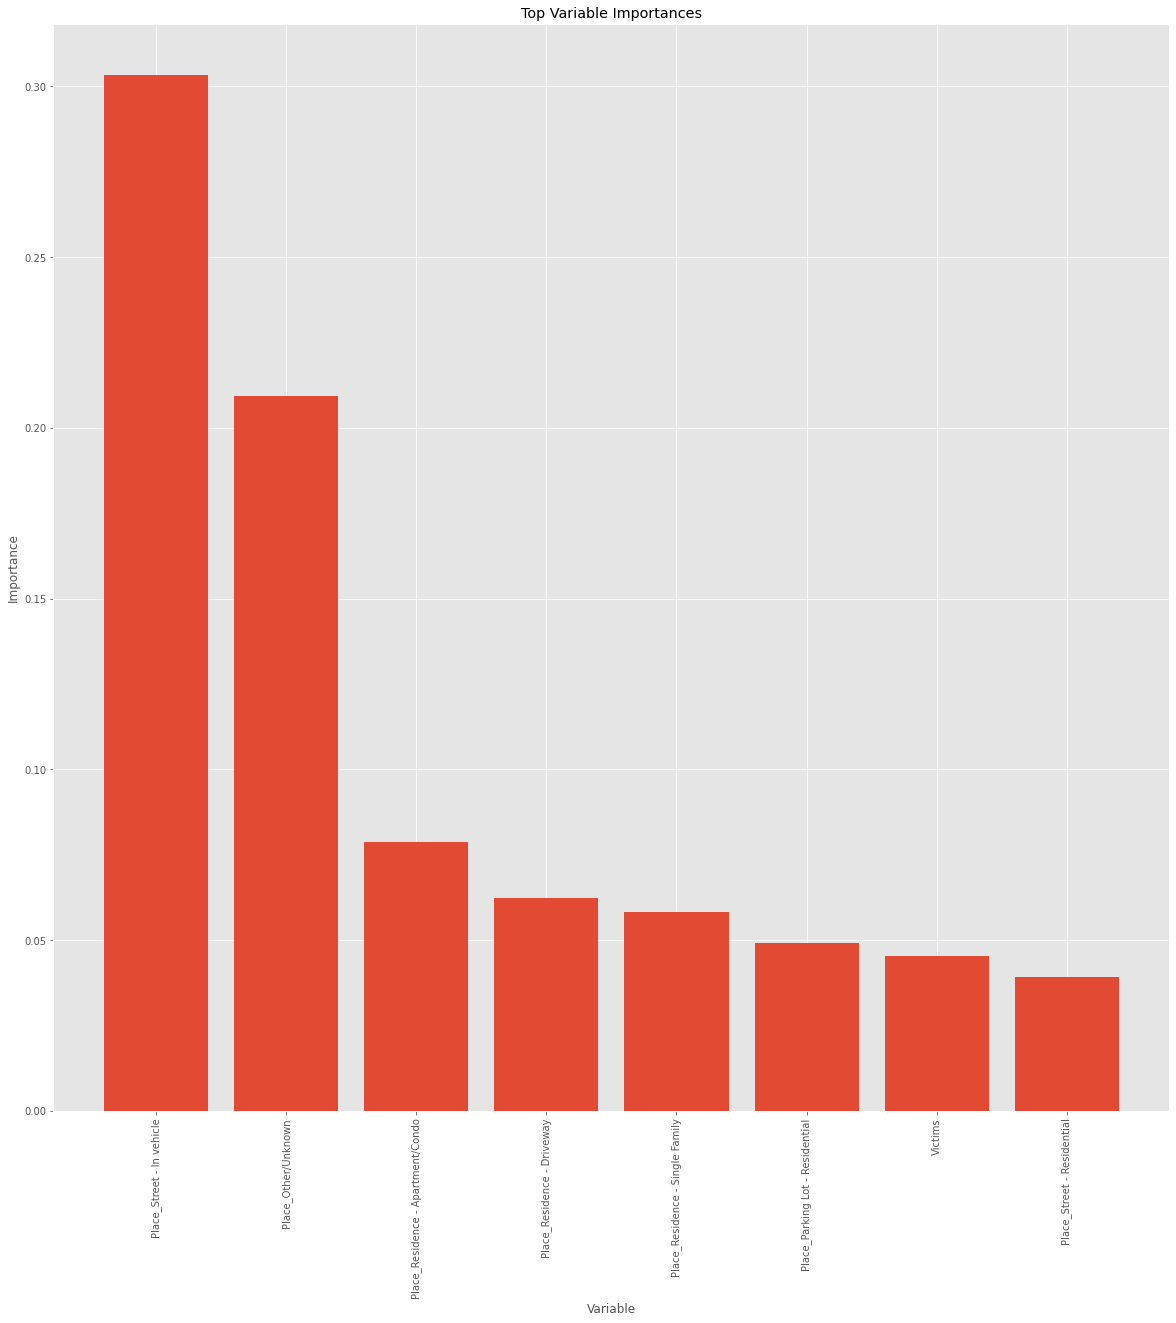

In [61]:
import matplotlib.pyplot as plt

x_values = list(range(len(top_importances)))
plt.bar(x_values, top_importances, orientation= 'vertical')
plt.xticks(x_values, top_features_list, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


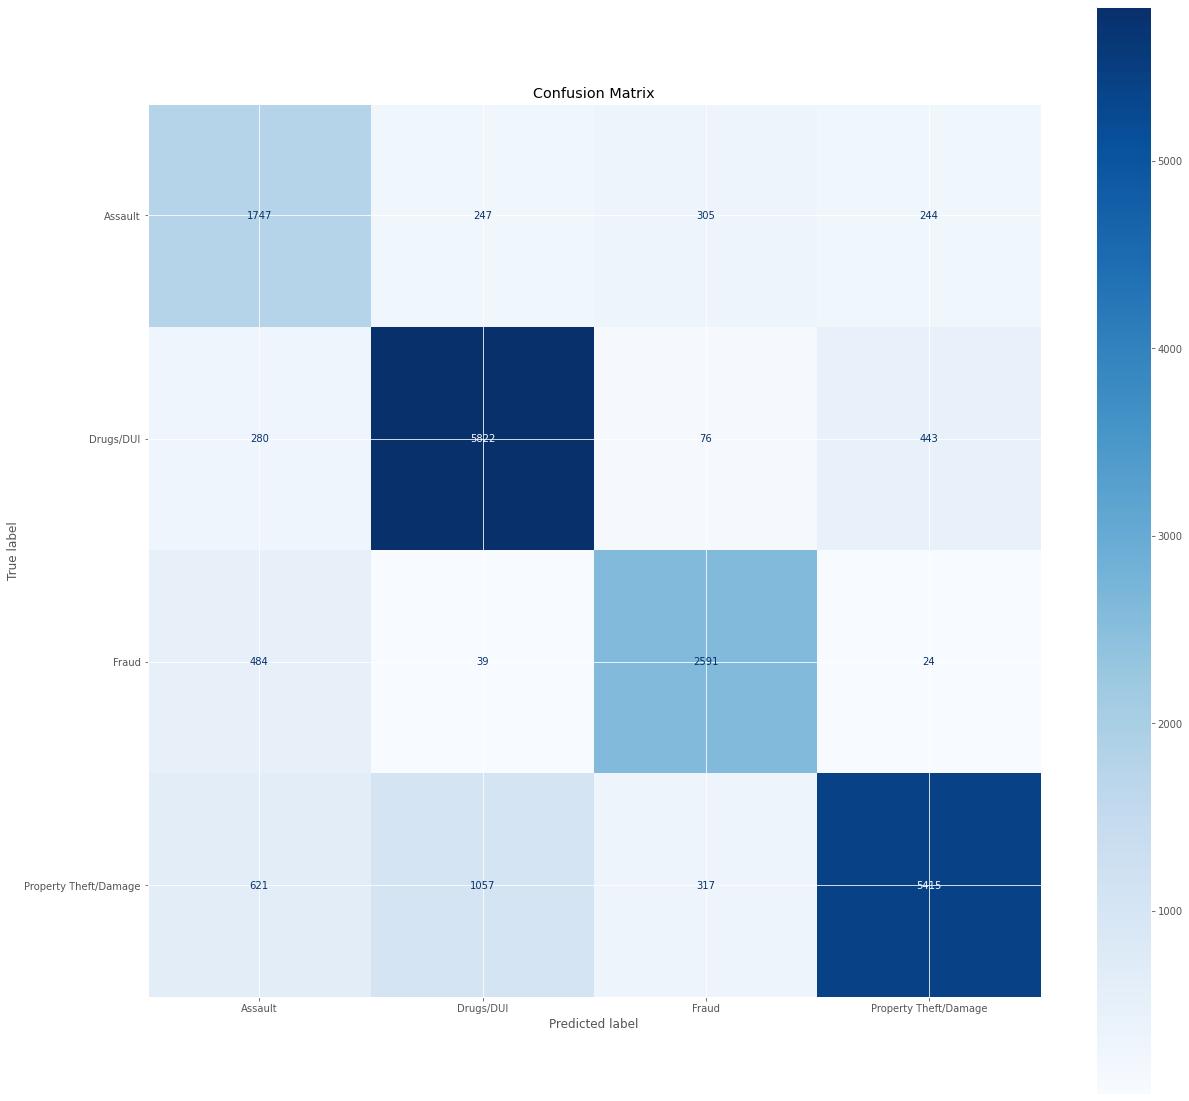

In [63]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model2, test2, test_labels2,display_labels=top_classes, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [64]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'max_features': ['auto','sqrt', None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs= -1,cv=3,
                       n_iter = 10, verbose = 1, random_state=4)

rs.fit(train2, train_labels2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [65]:
print(rs.best_params_)

{'n_estimators': 33, 'min_samples_split': 2, 'max_leaf_nodes': 47, 'max_features': 0.6, 'max_depth': 16, 'bootstrap': False}


In [66]:
best_model = rs.best_estimator_

In [67]:
best_model.fit(train2,train_labels2)

RandomForestClassifier(bootstrap=False, max_depth=16, max_features=0.6,
                       max_leaf_nodes=47, n_estimators=33, random_state=4)

In [68]:
predictions6 = best_model.predict(test2)
accuracy_score(test_labels2, predictions6)

0.8160511363636364

In [69]:
importances2 = list(best_model.feature_importances_)
feature_list2 = list(features.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances2]

Variable: Place_Street - In vehicle                Importance: 0.46197904639953297
Variable: Place_Other/Unknown                      Importance: 0.21188921404923608
Variable: Place_Residence - Apartment/Condo        Importance: 0.06792854537476363
Variable: Place_Residence - Single Family          Importance: 0.06747553486152576
Variable: Place_Residence - Driveway               Importance: 0.05399353243069062
Variable: Victims                                  Importance: 0.04074127122825212
Variable: Place_Parking Lot - Residential          Importance: 0.039879953587640946
Variable: Place_Street - Residential               Importance: 0.03471041966130746
Variable: High School %                            Importance: 0.0063367200327447875
Variable: Income                                   Importance: 0.0036261295815961125
Variable: Police District Name_BETHESDA            Importance: 0.0021299156177162822
Variable: Age                                      Importance: 0.001733001365554

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [70]:
top_importances2 = []
top_features_list2 = []

for x,y in feature_importances2:
    if(y > 0.025):
        top_features_list2.append(x)
        top_importances2.append(y)
top_features_list2

['Place_Street - In vehicle',
 'Place_Other/Unknown',
 'Place_Residence - Apartment/Condo',
 'Place_Residence - Single Family',
 'Place_Residence - Driveway',
 'Victims',
 'Place_Parking Lot - Residential',
 'Place_Street - Residential']

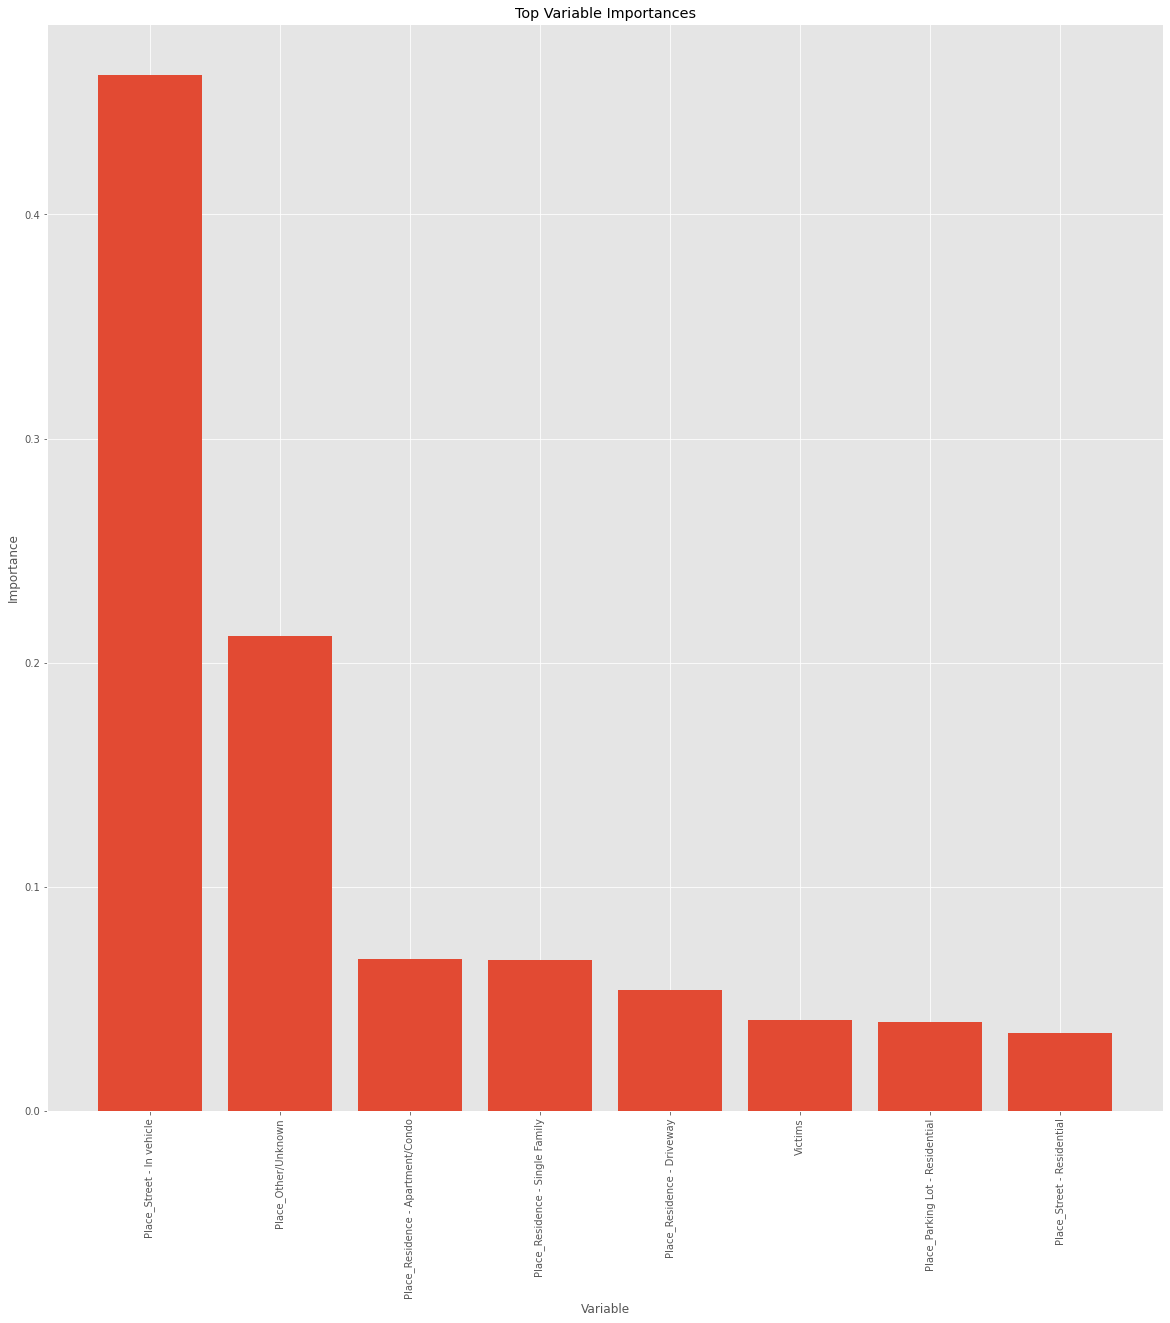

In [71]:
x_values2 = list(range(len(top_importances2)))
plt.bar(x_values2, top_importances2, orientation= 'vertical')
plt.xticks(x_values2, top_features_list2, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

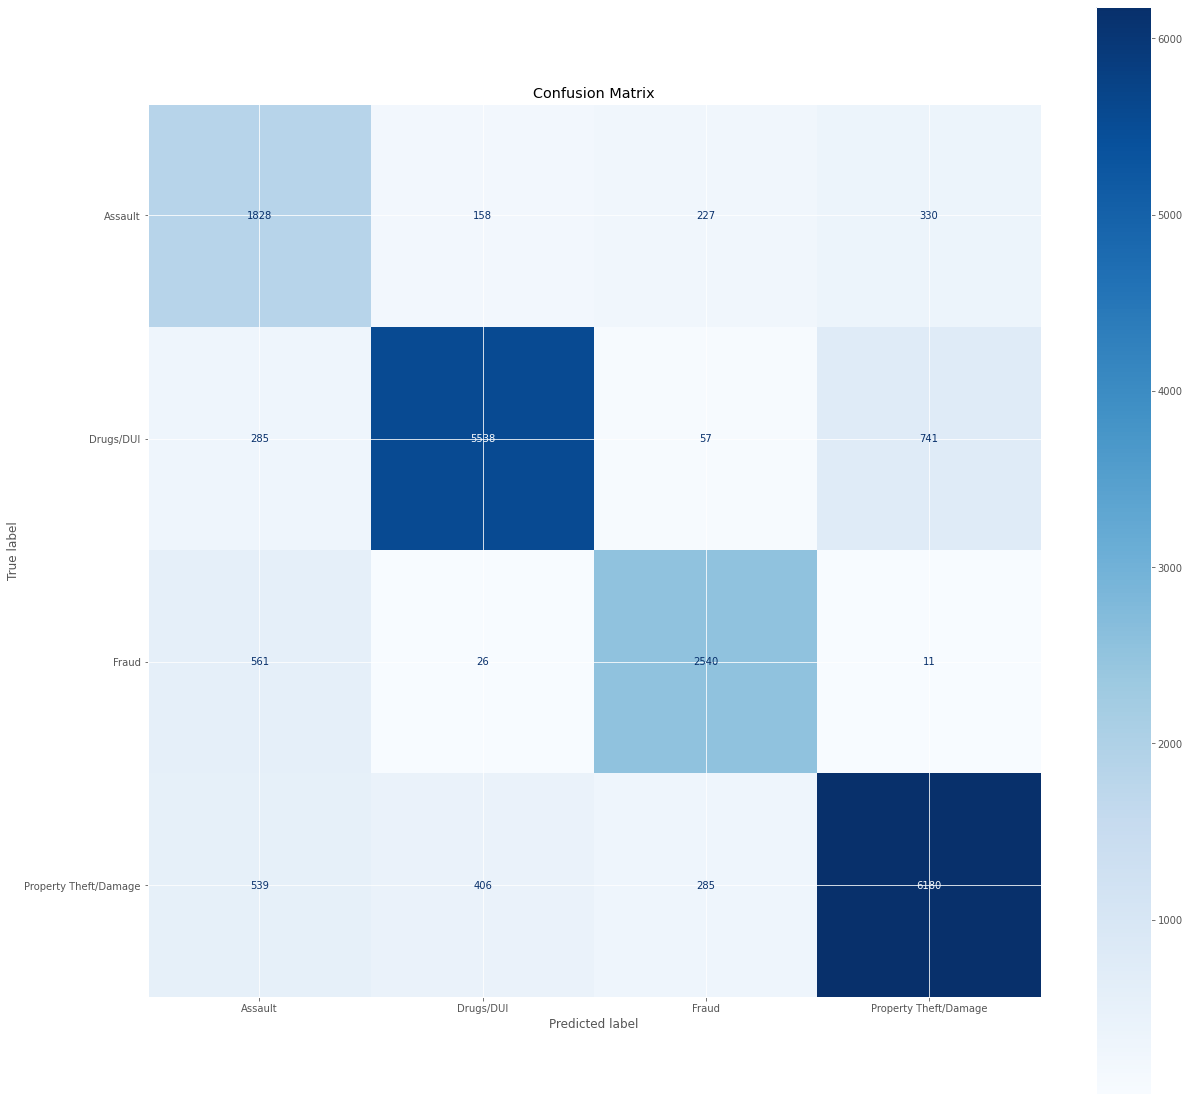

In [72]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, test2, test_labels2,display_labels=top_classes, cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [73]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb = XGBClassifier(n_estimators=100,
                   random_state=4,
                   max_depth=10,
                   )
xgb.fit(train2, train_labels2)

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=28, num_parallel_tree=1,
              objective='multi:softprob', random_state=4, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
predictions8 = xgb.predict(test2)

accuracy_score(test_labels2, predictions8)

0.8139204545454546

In [75]:
importances3 = list(xgb.feature_importances_)
feature_list3 = list(features.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances3]

Variable: Place_Street - In vehicle                Importance: 0.2630881369113922
Variable: Victims                                  Importance: 0.25586146116256714
Variable: Place_Other/Unknown                      Importance: 0.2549775242805481
Variable: Place_Residence - Apartment/Condo        Importance: 0.07568564265966415
Variable: Place_Residence - Single Family          Importance: 0.06688345968723297
Variable: Place_Residence - Driveway               Importance: 0.020992957055568695
Variable: Place_Street - Residential               Importance: 0.014591773971915245
Variable: Place_Parking Lot - Residential          Importance: 0.00756518030539155
Variable: Police District Name_BETHESDA            Importance: 0.006296961568295956
Variable: High School %                            Importance: 0.003760827472433448
Variable: Police District Name_MONTGOMERY VILLAGE  Importance: 0.003156173275783658
Variable: Police District Name_ROCKVILLE           Importance: 0.003154402831569314


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [76]:
top_features_list3 = []
top_importances3 = []

for x,y in feature_importances3:
    if(y > 0.025):
        top_features_list3.append(x)
        top_importances3.append(y)

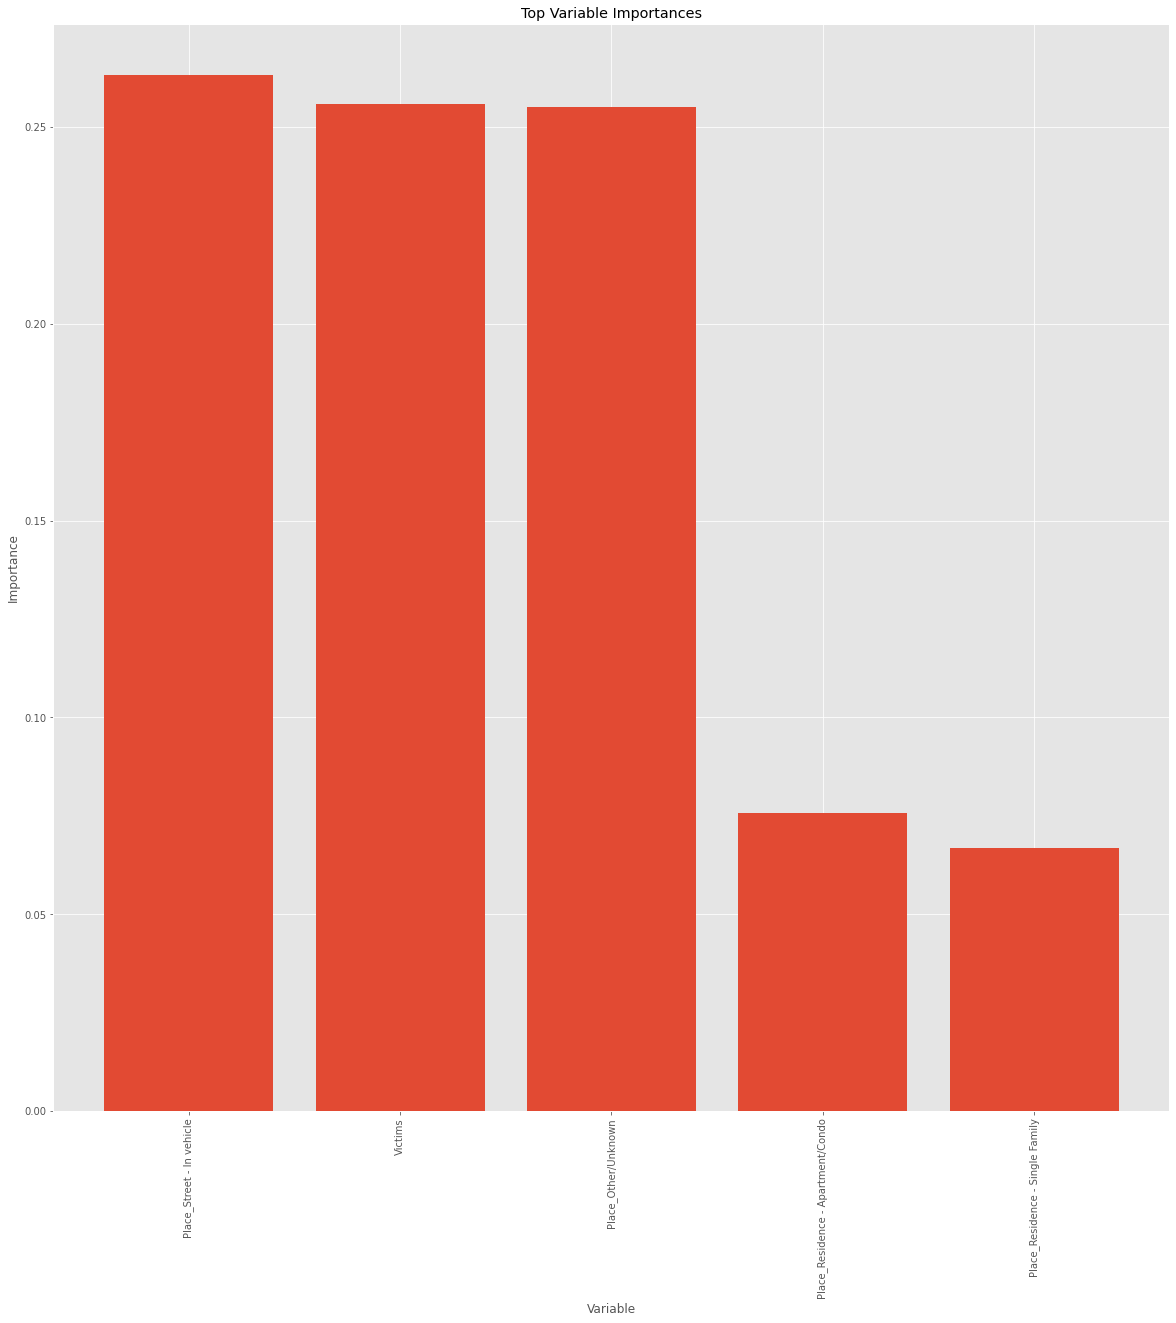

In [77]:
x_values3 = list(range(len(top_importances3)))
plt.bar(x_values3, top_importances3, orientation= 'vertical')
plt.xticks(x_values3, top_features_list3, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

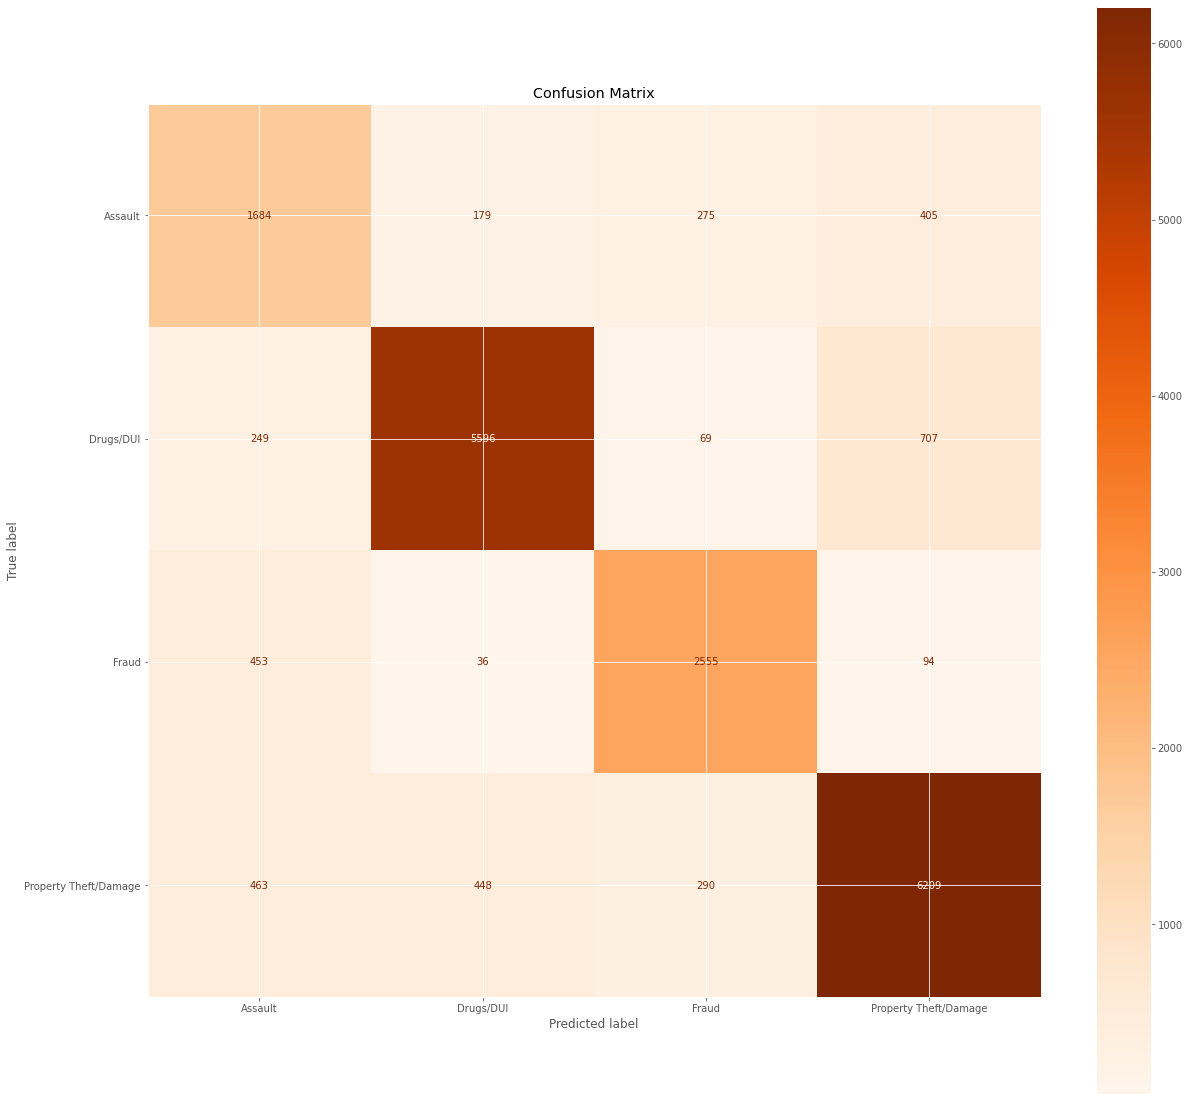

In [78]:
plot_confusion_matrix(xgb, test2, test_labels2,display_labels=top_classes, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [79]:
lgbm = LGBMClassifier(n_estimators=100,
                     random_state=4,
                     max_depth=10,
                     n_jobs=-1)

lgbm.fit(train2, train_labels2)

LGBMClassifier(max_depth=10, random_state=4)

In [80]:
predictions7 = lgbm.predict(test2)

accuracy_score(test_labels2, predictions7)

0.8162540584415584

In [81]:
lgbm.feature_importances_

array([ 296, 1462, 1333, 1337, 1370, 1107, 1242, 1069,  312,  275,  216,
        163,  271,  362,  318,  171,   94,   84,   99,    0,  167,  139,
          0,  113], dtype=int32)

In [82]:
lgbm_importances = lgbm.feature_importances_/sum(lgbm.feature_importances_)
importances4 = list(lgbm_importances)
feature_list4 = list(features.columns)
feature_importances4 = [(feature, importance) for feature, importance in zip(feature_list4,importances4)]
feature_importances4 = sorted(feature_importances4, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances4]

Variable: Pop                                      Importance: 0.12183333333333334
Variable: High School %                            Importance: 0.11416666666666667
Variable: Age                                      Importance: 0.11141666666666666
Variable: Income                                   Importance: 0.11108333333333334
Variable: Public Transportation %                  Importance: 0.1035
Variable: Bachelors %                              Importance: 0.09225
Variable: Unemployed %                             Importance: 0.08908333333333333
Variable: Place_Street - In vehicle                Importance: 0.030166666666666668
Variable: Place_Street - Residential               Importance: 0.0265
Variable: Place_Other/Unknown                      Importance: 0.026
Variable: Victims                                  Importance: 0.024666666666666667
Variable: Place_Parking Lot - Residential          Importance: 0.022916666666666665
Variable: Place_Residence - Single Family          Im

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [83]:
top_features_list4 = []
top_importances4 = []

for x,y in feature_importances4:
    if(y > 0.025):
        top_features_list4.append(x)
        top_importances4.append(y)

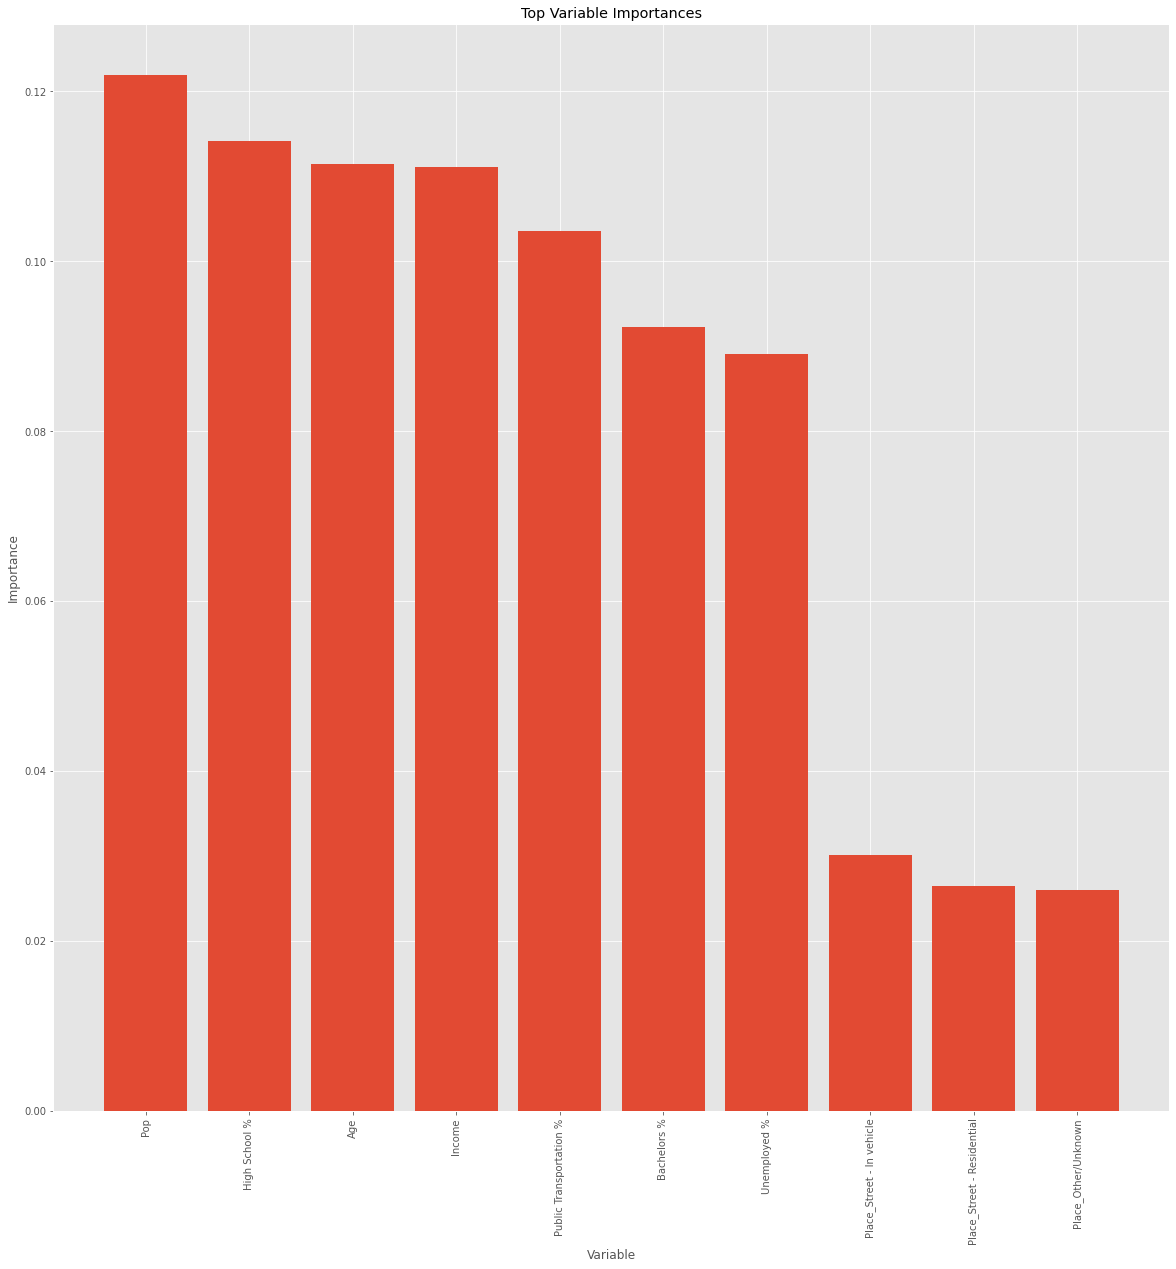

In [84]:
x_values4 = list(range(len(top_importances4)))
plt.bar(x_values4, top_importances4, orientation= 'vertical')
plt.xticks(x_values4, top_features_list4, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

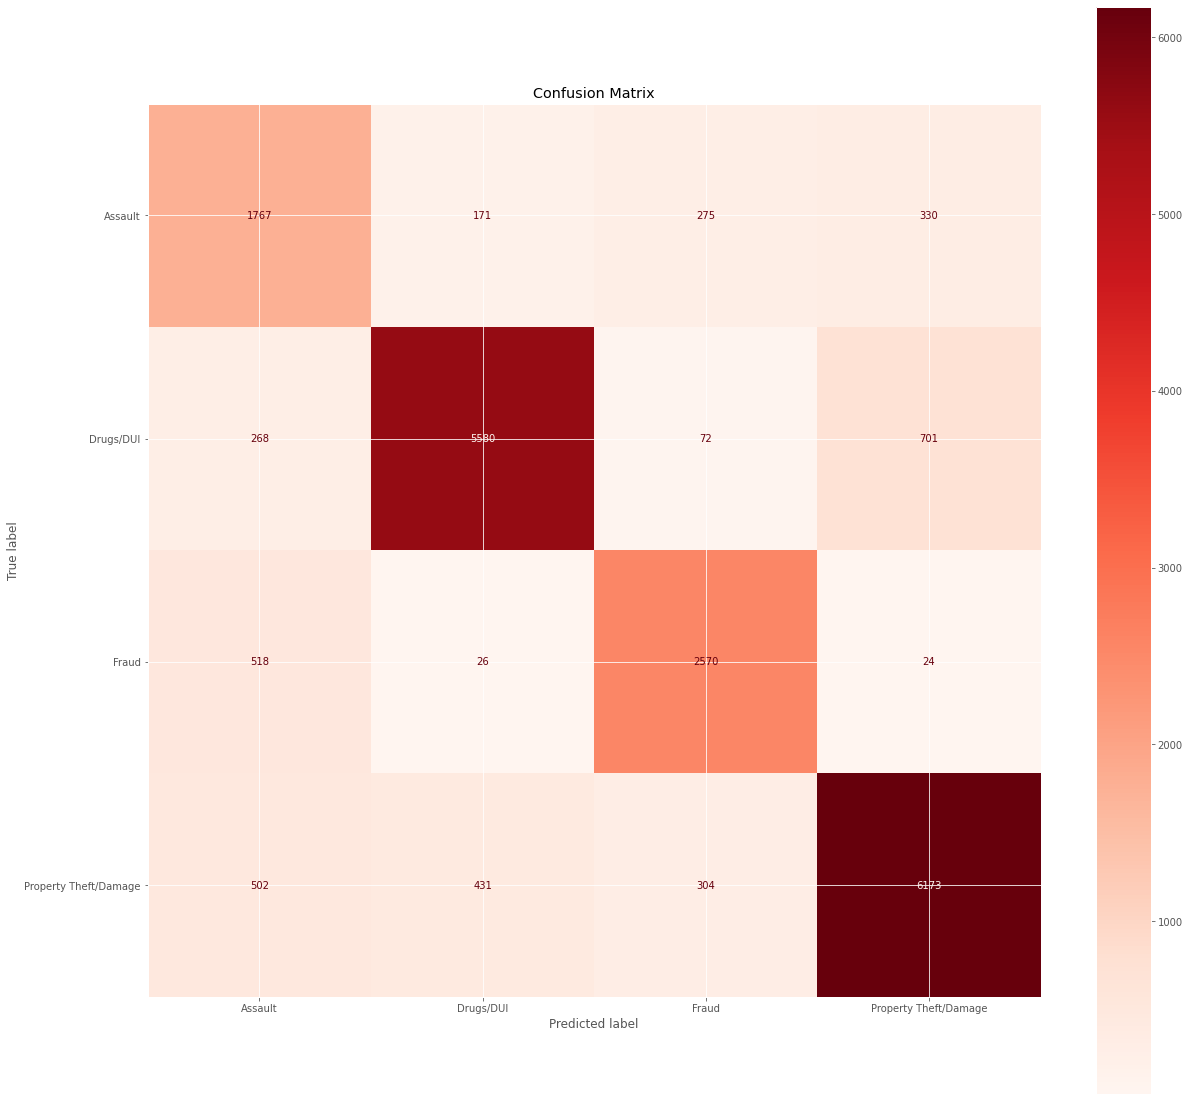

In [85]:
plot_confusion_matrix(lgbm, test2, test_labels2,display_labels=top_classes, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [99]:
from sklearn.ensemble import VotingClassifier

estimators = [('rf', best_model),('xgbm', xgb),('lgbm',lgbm)]

ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(train2, train_labels2)

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=16,
                                                     max_features=0.6,
                                                     max_leaf_nodes=47,
                                                     n_estimators=33,
                                                     random_state=4)),
                             ('xgbm',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0...2,
         

In [100]:
predictions_final = ensemble.predict(test2)

accuracy_score(test_labels2,predictions_final)

0.8168120941558441

In [101]:
ensemble.score(test2,test_labels2)

0.8168120941558441

In [112]:
import tensorflow as tf

predictions_new = tf.keras.utils.to_categorical(predictions_final)
y_test2 = tf.keras.utils.to_categorical(test_labels2)

In [114]:
predictions_new[:,1]

array([0., 0., 1., ..., 0., 1., 0.], dtype=float32)

In [115]:
y_test2[:,1]

array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


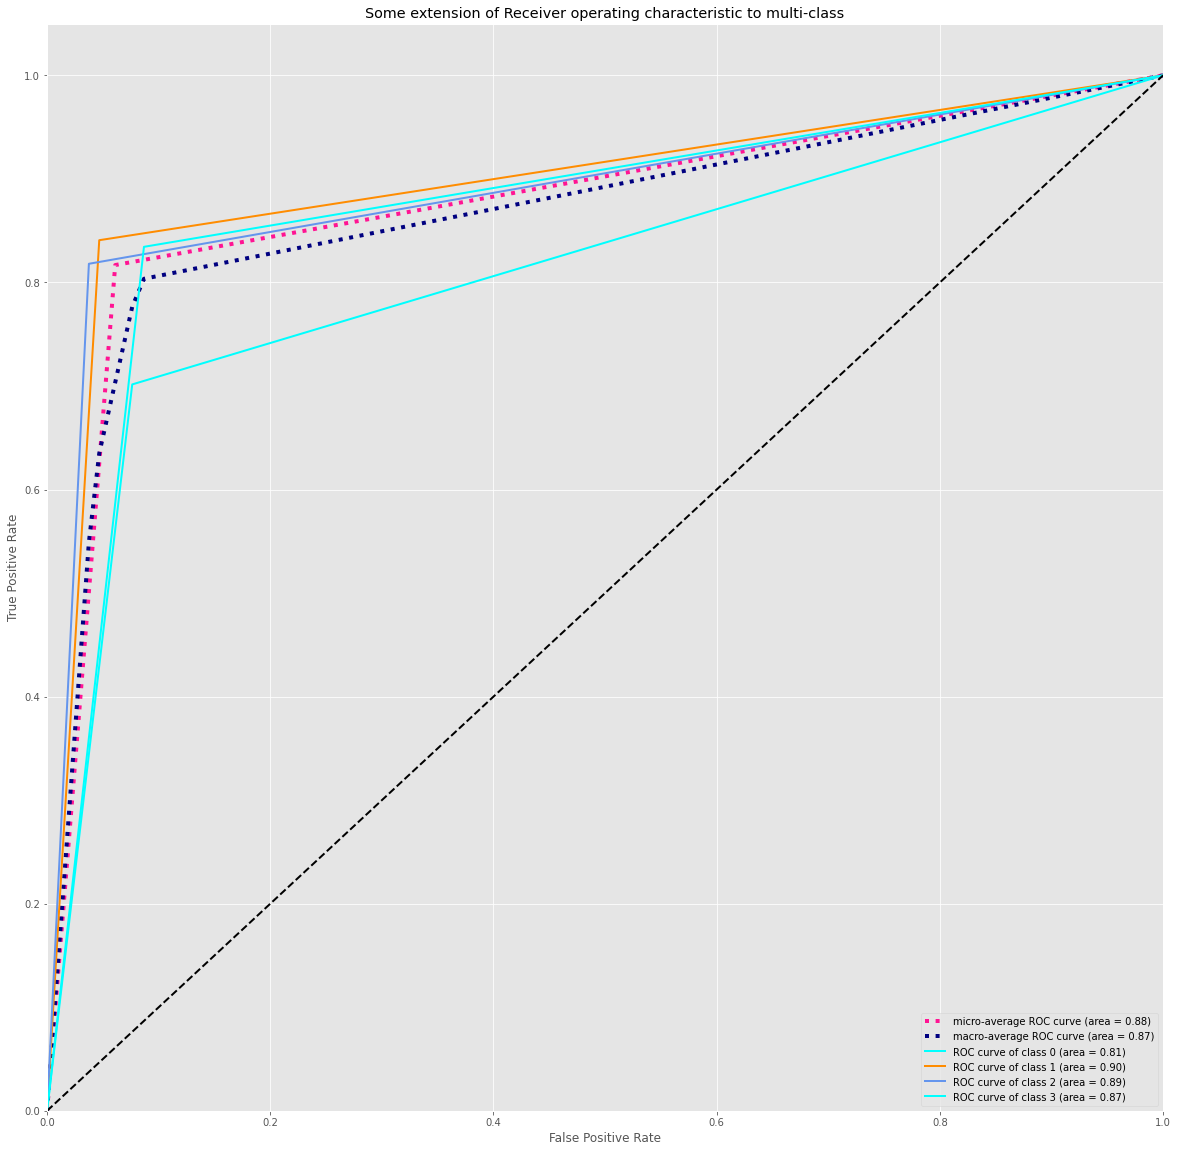

In [116]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(top_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], predictions_new[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test2.ravel(), predictions_new.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(top_classes))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(top_classes)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(top_classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(top_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [118]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(top_classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test2[:, i],
                                                        predictions_new[:, i])
    average_precision[i] = average_precision_score(y_test2[:, i], predictions_new[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test2.ravel(),
    predictions_new.ravel())
average_precision["micro"] = average_precision_score(y_test2, predictions_new,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.71


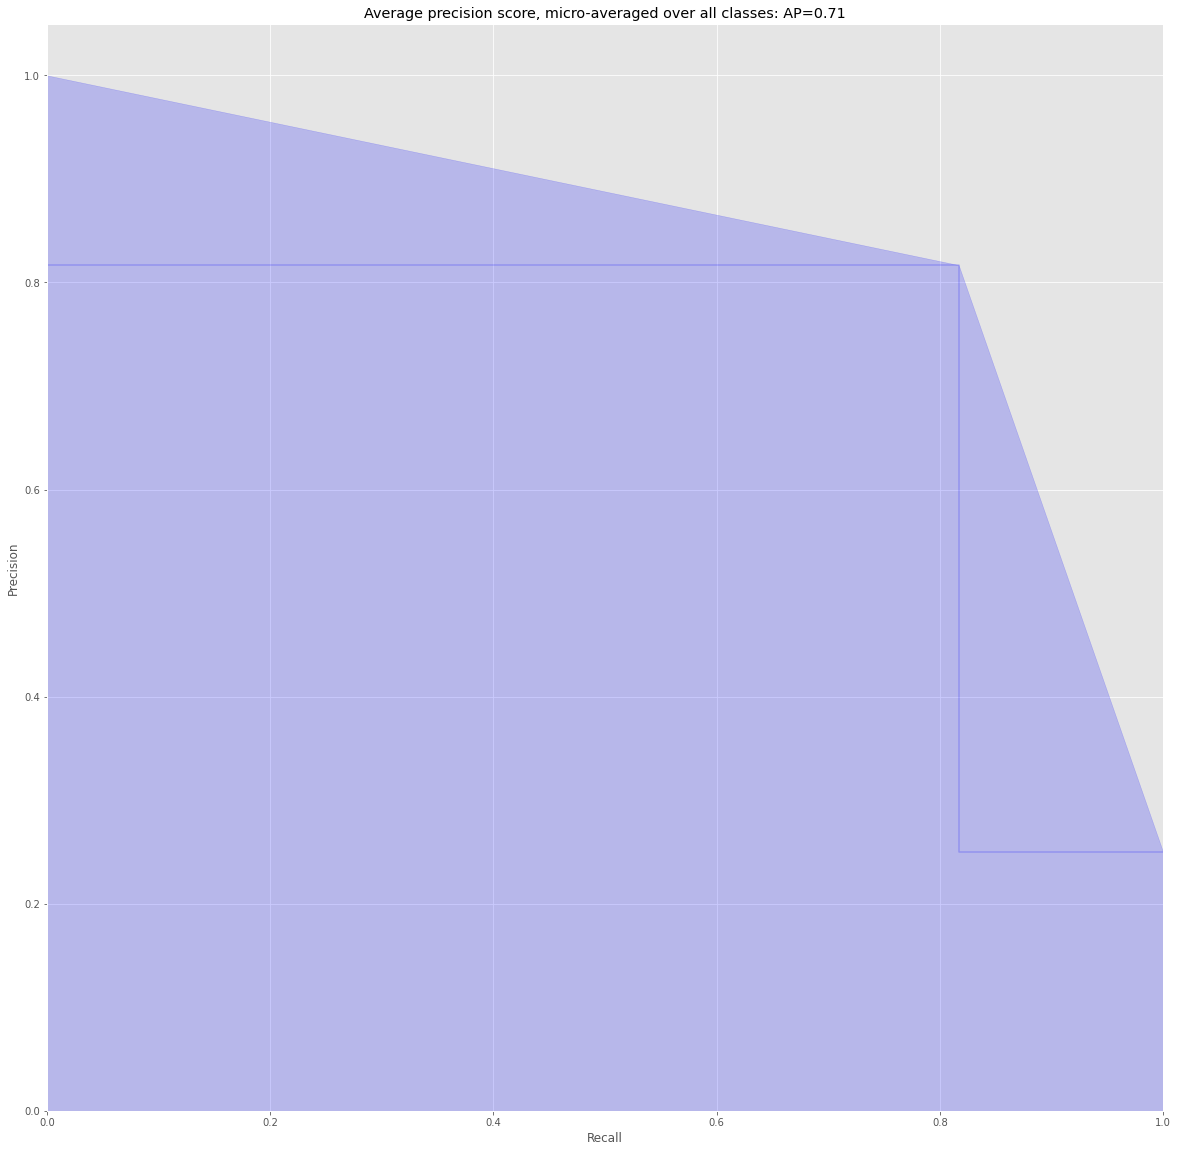

In [119]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                 #**step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
fig = plt.gcf()
fig.set_size_inches(20,20)

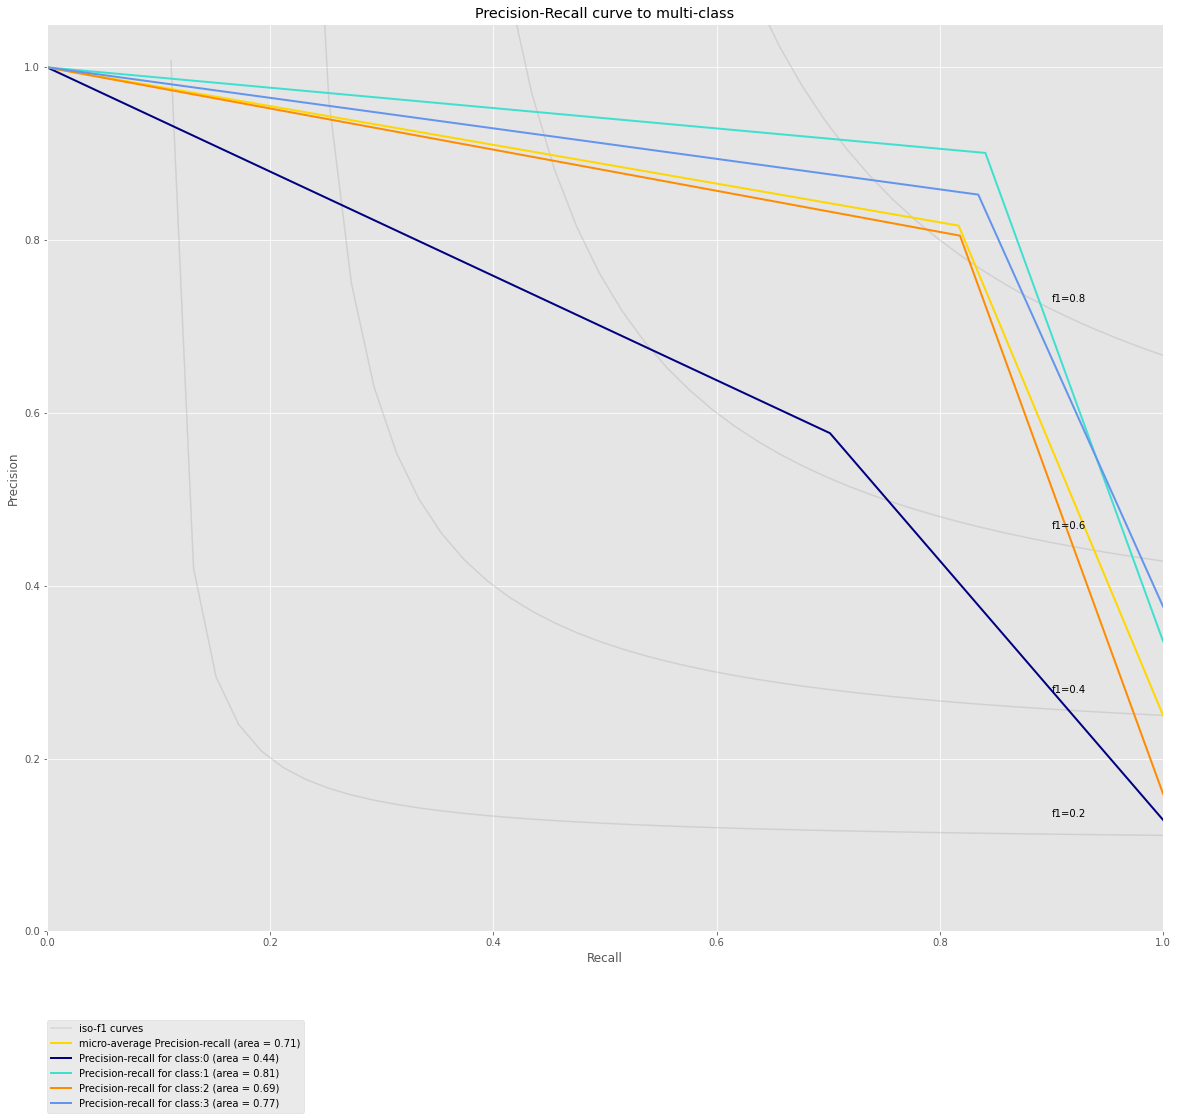

In [120]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(14, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(len(top_classes)), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.2), prop=dict(size=10))
fig = plt.gcf()
fig.set_size_inches(20,20)

plt.show()

In [121]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(y_test2, predictions_new, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test2, predictions_new, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test2, predictions_new, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test2, predictions_new, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.868432 (macro),
0.876333 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.868432 (macro),
0.876333 (weighted by prevalence)
